In [1]:
!pip install opencv-python
import numpy as np 
import pandas as pd
# import file utilities
import os
import glob
import random

# import charting
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation 
%matplotlib inline

from IPython.display import HTML
# import computer vision
import cv2
#from skimage.measure import compare_ssim

In [2]:
realdata = "FF++/real"
fakedata = "FF++/fake"

In [3]:
def count_videos_in_folder(folder_path):
    video_count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".mp4", ".avi", ".mkv")):
            video_count += 1
    return video_count


real_video_count = count_videos_in_folder(realdata)
fake_video_count = count_videos_in_folder(fakedata)

print(f"Number of real videos: {real_video_count}")
print(f"Number of fake videos: {fake_video_count}")

Number of real videos: 12
Number of fake videos: 12


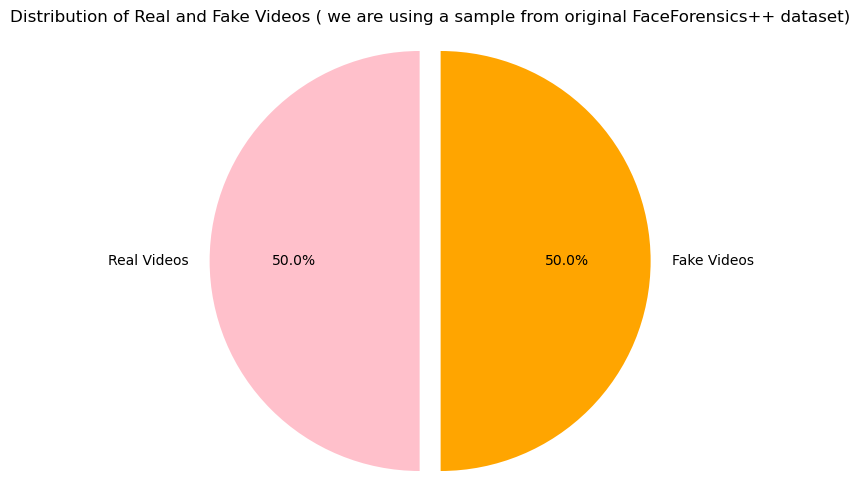

In [4]:
labels = ['Real Videos', 'Fake Videos']
sizes = [real_video_count, fake_video_count]
colors = ['pink', 'orange']
explode = (0.1, 0)  # Explode the first slice (Real Videos)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Real and Fake Videos ( we are using a sample from original FaceForensics++ dataset)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

In [5]:
def save_frames_from_videos(video_folder, output_folder, max_frames_per_video=50):
    """
    Extract frames from all videos in a folder and save them as images.
    
    Args:
        video_folder (str): Path to the folder containing videos.
        output_folder (str): Path to the folder where frames will be saved.
        max_frames_per_video (int): Maximum number of frames to extract from each video.
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Iterate over all videos in the folder
    for video_file in os.listdir(video_folder):
        video_path = os.path.join(video_folder, video_file)
        cap = cv2.VideoCapture(video_path)
        
        if not cap.isOpened():
            print(f"Error opening video file: {video_file}")
            continue
        
        frame_count = 0
        video_name = os.path.splitext(video_file)[0]
        
        while True:
            ret, frame = cap.read()
            if not ret or frame_count >= max_frames_per_video:
                break
            
            # Save the frame
            frame_path = os.path.join(output_folder, f"{video_name}_frame_{frame_count}.jpg")
            cv2.imwrite(frame_path, frame)
            frame_count += 1
        
        cap.release()
        print(f"Extracted {frame_count} frames from {video_file}")

# Paths to real and fake data folders
realdata = "FF++/real"
fakedata = "FF++/fake"

# Output folders for saving frames
real_output_folder = "real_frames"
fake_output_folder = "fake_frames"

# Extract frames from all videos in real and fake folders
save_frames_from_videos(realdata, real_output_folder)
save_frames_from_videos(fakedata, fake_output_folder)


Extracted 50 frames from 01__exit_phone_room.mp4
Extracted 50 frames from 01__hugging_happy.mp4
Extracted 50 frames from 01__kitchen_pan.mp4
Extracted 50 frames from 01__kitchen_still.mp4
Extracted 50 frames from 01__meeting_serious.mp4
Extracted 50 frames from 01__outside_talking_pan_laughing.mp4
Extracted 50 frames from 01__outside_talking_still_laughing.mp4
Extracted 50 frames from 01__podium_speech_happy.mp4
Extracted 50 frames from 01__secret_conversation.mp4
Extracted 50 frames from 01__talking_against_wall.mp4
Extracted 50 frames from 01__talking_angry_couch.mp4
Extracted 50 frames from 01__walk_down_hall_angry.mp4
Extracted 50 frames from 01_02__outside_talking_still_laughing__YVGY8LOK.mp4
Extracted 50 frames from 01_02__walk_down_hall_angry__YVGY8LOK.mp4
Extracted 50 frames from 01_03__hugging_happy__ISF9SP4G.mp4
Extracted 50 frames from 01_03__podium_speech_happy__480LQD1C.mp4
Extracted 50 frames from 01_03__talking_against_wall__JZUXXFRB.mp4
Extracted 50 frames from 01_11__m

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,        # Rotate images by up to 20 degrees
    width_shift_range=0.2,    # Shift the image width by up to 20% of the frame size
    height_shift_range=0.2,   # Shift the image height by up to 20% of the frame size
    shear_range=0.2,          # Apply shearing transformations
    zoom_range=0.2,           # Randomly zoom into the images
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in any missing pixels after transformations
)

# Paths to original frames and augmented output folders
real_frames_folder = "real_frames"
fake_frames_folder = "fake_frames"
augmented_real_folder = "augmented_real_frames"
augmented_fake_folder = "augmented_fake_frames"

# Create output folders if they don't exist
os.makedirs(augmented_real_folder, exist_ok=True)
os.makedirs(augmented_fake_folder, exist_ok=True)

def augment_frames(input_folder, output_folder, augment_count_per_image=5):
    """
    Augments frames from the input folder and saves them to the output folder.
    
    Args:
        input_folder (str): Path to the folder containing frames.
        output_folder (str): Path to save augmented frames.
        augment_count_per_image (int): Number of augmented images to generate per input frame.
    """
    for frame_file in os.listdir(input_folder):
        frame_path = os.path.join(input_folder, frame_file)
        frame = cv2.imread(frame_path)
        if frame is None:
            print(f"Error reading frame: {frame_file}")
            continue
        
        # Resize to a fixed size (224x224 for model compatibility)
        frame = cv2.resize(frame, (224, 224))
        frame = frame.reshape((1,) + frame.shape)  # Add batch dimension
        
        # Generate augmented images
        i = 0
        for batch in datagen.flow(frame, batch_size=1, save_to_dir=output_folder,
                                  save_prefix=frame_file.split('.')[0], save_format="jpg"):
            i += 1
            if i >= augment_count_per_image:
                break

# Augment real and fake frames
augment_frames(real_frames_folder, augmented_real_folder, augment_count_per_image=5)
augment_frames(fake_frames_folder, augmented_fake_folder, augment_count_per_image=5)

print("Augmentation complete. Check the augmented frames in the respective folders.")



Augmentation complete. Check the augmented frames in the respective folders.


In [7]:
real_augmented = os.listdir("augmented_real_frames")
fake_augmented = os.listdir("augmented_fake_frames")

print(f"Number of augmented real frames: {len(real_augmented)}")
print(f"Number of augmented fake frames: {len(fake_augmented)}")

Number of augmented real frames: 2999
Number of augmented fake frames: 3000


In [8]:
from sklearn.model_selection import train_test_split

# Paths to real and fake augmented frames
real_frames = ["augmented_real_frames/" + frame for frame in os.listdir("augmented_real_frames")]
fake_frames = ["augmented_fake_frames/" + frame for frame in os.listdir("augmented_fake_frames")]

# Create labels (0 for real, 1 for fake)
real_labels = [0] * len(real_frames)
fake_labels = [1] * len(fake_frames)

# Combine and split
all_frames = real_frames + fake_frames
all_labels = real_labels + fake_labels

X_train, X_temp, y_train, y_temp = train_test_split(all_frames, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

print(f"Training set: {len(X_train)} frames")
print(f"Validation set: {len(X_val)} frames")
print(f"Test set: {len(X_test)} frames")

Training set: 4199 frames
Validation set: 1206 frames
Test set: 594 frames


In [4]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Paths to real and fake augmented frames
real_frames = ["augmented_real_frames/" + frame for frame in os.listdir("augmented_real_frames")]
fake_frames = ["augmented_fake_frames/" + frame for frame in os.listdir("augmented_fake_frames")]

# Create labels (0 for real, 1 for fake)
real_labels = [0] * len(real_frames)
fake_labels = [1] * len(fake_frames)

# Combine and split
all_frames = real_frames + fake_frames
all_labels = real_labels + fake_labels

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_frames, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

print(f"Training set: {len(X_train)} frames")
print(f"Validation set: {len(X_val)} frames")
print(f"Test set: {len(X_test)} frames")

# Preprocess the frames (resize and normalize)
def preprocess_frames(file_paths, target_size=(224, 224)):
    data = []
    for file_path in file_paths:
        # Load the image
        img = cv2.imread(file_path)
        if img is None:
            continue
        # Resize the image
        img = cv2.resize(img, target_size)
        # Normalize pixel values
        img = img / 255.0
        data.append(img)
    return np.array(data)

# Preprocess the data
X_train_processed = preprocess_frames(X_train)
X_val_processed = preprocess_frames(X_val)
X_test_processed = preprocess_frames(X_test)

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(f"Training data shape: {X_train_processed.shape}")
print(f"Validation data shape: {X_val_processed.shape}")
print(f"Test data shape: {X_test_processed.shape}")


Training set: 4199 frames
Validation set: 1206 frames
Test set: 594 frames
Training data shape: (4199, 224, 224, 3)
Validation data shape: (1206, 224, 224, 3)
Test data shape: (594, 224, 224, 3)


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (we don't want to train them)
base_model.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (real or fake)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17926209 (68.38 MB)
Trainable params: 3211521 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [6]:
# Train the model using the preprocessed data
history = model.fit(
    X_train_processed, y_train, 
    validation_data=(X_val_processed, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10


132/132 [==============================] - 592s 4s/step - loss: 0.7439 - accuracy: 0.6318 - val_loss: 0.5619 - val_accuracy: 0.7214
Epoch 2/10
132/132 [==============================] - 607s 5s/step - loss: 0.5665 - accuracy: 0.6814 - val_loss: 0.5285 - val_accuracy: 0.7015
Epoch 3/10
132/132 [==============================] - 591s 4s/step - loss: 0.5306 - accuracy: 0.7023 - val_loss: 0.4886 - val_accuracy: 0.7032
Epoch 4/10
132/132 [==============================] - 586s 4s/step - loss: 0.5003 - accuracy: 0.7254 - val_loss: 0.4777 - val_accuracy: 0.7181
Epoch 5/10
132/132 [==============================] - 559s 4s/step - loss: 0.4856 - accuracy: 0.7242 - val_loss: 0.4847 - val_accuracy: 0.7056
Epoch 6/10
132/132 [==============================] - 560s 4s/step - loss: 0.4838 - accuracy: 0.7185 - val_loss: 0.4884 - val_accuracy: 0.7197
Epoch 7/10
132/132 [==============================] - 581s 4s/step - loss: 0.4708 - accuracy: 0.7304 - val_loss: 0.4791 - val_accuracy: 0.71

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test, batch_size=32)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


19/19 [==============================] - 55s 3s/step - loss: 0.4926 - accuracy: 0.7020
Test Loss: 0.4926024079322815
Test Accuracy: 0.7020202279090881


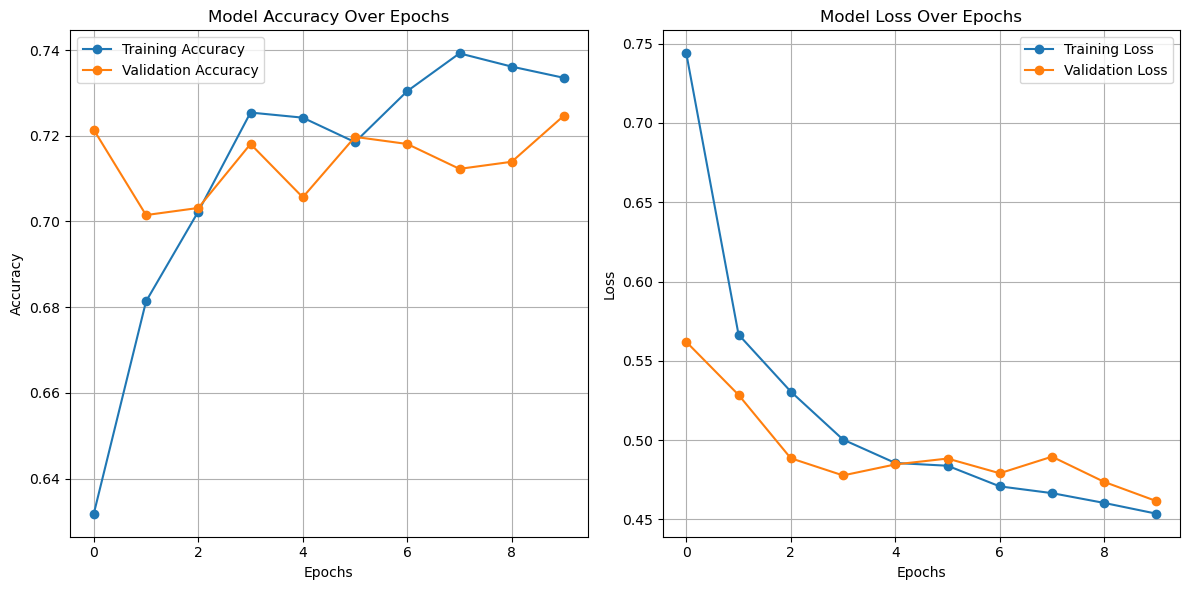

In [10]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history from model.fit()
# Example: history = model.fit(...)

# Plot accuracy
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes for test data (threshold: 0.5 for sigmoid)
y_pred = (model.predict(X_test_processed) > 0.5).astype(int).flatten()

# True labels
y_true = y_test

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_true, y_pred, target_names=["Real", "Fake"])
print("Classification Report:\n", report)


19/19 [==============================] - 55s 3s/step
Confusion Matrix:
 [[190 121]
 [ 56 227]]
Classification Report:
               precision    recall  f1-score   support

        Real       0.77      0.61      0.68       311
        Fake       0.65      0.80      0.72       283

    accuracy                           0.70       594
   macro avg       0.71      0.71      0.70       594
weighted avg       0.72      0.70      0.70       594



In [12]:
# Save the model in HDF5 format
model.save("model_real_fake.h5")
print("Model saved successfully!")

C:\Users\aarth\anaconda updated\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!
